<a href="https://colab.research.google.com/github/jronald88/NLP_Project/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project

In [1]:
#!pip install -r "/workspaces/NLP_Project/requirements.txt"

**Imports**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




**Globals**

In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"
tfidf = False

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [6]:
df["is_spam_1"] = df["is_spam"].apply(lambda x: 1 if x is True else 0).astype(int)
df.head()


,url,is_spam,is_spam_1
0,https://briefingday.us8.list-manage.com/unsubs...,True,1
1,https://www.hvper.com/,True,1
2,https://briefingday.com/m/v4n3i4f3,True,1
3,https://briefingday.com/n/20200618/m#commentform,False,0
4,https://briefingday.com/fan,True,1


In [7]:
df["is_spam_2"] = df["is_spam"].replace(True, 1).replace(False, 0)
df.head()

,url,is_spam,is_spam_1,is_spam_2
0,https://briefingday.us8.list-manage.com/unsubs...,True,1,1
1,https://www.hvper.com/,True,1,1
2,https://briefingday.com/m/v4n3i4f3,True,1,1
3,https://briefingday.com/n/20200618/m#commentform,False,0,0
4,https://briefingday.com/fan,True,1,1


In [8]:
print(df.shape)
print(f"Spam: {len(df.loc[df.is_spam == 1])}")
print(f"No spam: {len(df.loc[df.is_spam == 0])}")

(2999, 4)
Spam: 696
No spam: 2303


In [9]:
df = df.drop_duplicates().reset_index(inplace = False, drop = True)
df.head()


,url,is_spam,is_spam_1,is_spam_2
0,https://briefingday.us8.list-manage.com/unsubs...,True,1,1
1,https://www.hvper.com/,True,1,1
2,https://briefingday.com/m/v4n3i4f3,True,1,1
3,https://briefingday.com/n/20200618/m#commentform,False,0,0
4,https://briefingday.com/fan,True,1,1


In [10]:
"""
def preprocess_text_extreme(text):
    # Remove https:// www. and .com
    text = re.sub(r'^https?://([^/]+)/?', r'\1', text)
    text = re.sub(r'^www.','',text)
    text = re.sub(r'\.(com|org|net|edu|gov|co\.uk|io|ai|app)$','', text)


    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)

    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df["url"] = df["url"].apply(preprocess_text)
df.head()
"""

'\ndef preprocess_text_extreme(text):\n    # Remove https:// www. and .com\n    text = re.sub(r\'^https?://([^/]+)/?\', r\'\x01\', text)\n    text = re.sub(r\'^www.\',\'\',text)\n    text = re.sub(r\'\\.(com|org|net|edu|gov|co\\.uk|io|ai|app)$\',\'\', text)\n\n\n    # Remove any character that is not a letter (a-z) or white space ( )\n    text = re.sub(r\'[^a-z ]\', " ", text)\n    \n    # Remove white spaces\n    text = re.sub(r\'\\s+[a-zA-Z]\\s+\', " ", text)\n    text = re.sub(r\'\\^[a-zA-Z]\\s+\', " ", text)\n\n    # Multiple white spaces into one\n    text = re.sub(r\'\\s+\', " ", text.lower())\n\n    # Remove tags\n    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)\n\n    return text.split()\n\ndf["url"] = df["url"].apply(preprocess_text)\ndf.head()\n'

In [11]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)

    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    text = text.replace('http','').replace('https','')

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

In [12]:
df["url"] = df["url"].apply(preprocess_text)
df.head()

,url,is_spam,is_spam_1,is_spam_2
0,"[s, briefingday, us, list, manage, com, unsubs...",True,1,1
1,"[s, www, hvper, com]",True,1,1
2,"[s, briefingday, com, v, i]",True,1,1
3,"[s, briefingday, com, m, commentform]",False,0,0
4,"[s, briefingday, com, fan]",True,1,1


In [13]:
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df["url"] = df["url"].apply(lemmatize_text)
df.head()

,url,is_spam,is_spam_1,is_spam_2
0,"[briefingday, list, manage, unsubscribe]",True,1,1
1,[hvper],True,1,1
2,[briefingday],True,1,1
3,"[briefingday, commentform]",False,0,0
4,[briefingday],True,1,1


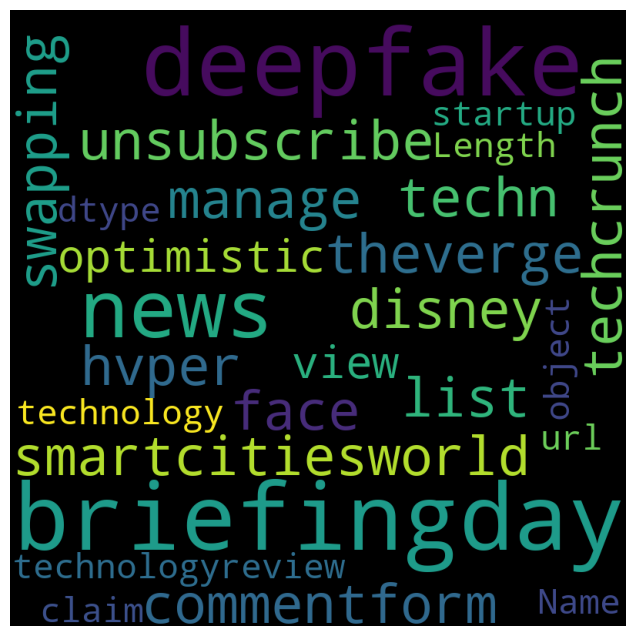

In [15]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
tokens_list = df["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

if tfidf:
    vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
else:
    vectorizer = CountVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)

X = vectorizer.fit_transform(tokens_list).toarray()
y = df["is_spam"]

X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [18]:
X_train[1].shape

(538,)

In [19]:
# Assuming X_train is your training data containing multi-label data
"""
# Create a MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# Fit the binarizer to your training data
X_train_binary = mlb.fit_transform(X_train)
y_train_binary = mlb.transform(y_train)

# Transform your testing data using the same binarizer
X_test_binary = mlb.transform(X_test)
"""

'\n# Create a MultiLabelBinarizer object\nmlb = MultiLabelBinarizer()\n\n# Fit the binarizer to your training data\nX_train_binary = mlb.fit_transform(X_train)\ny_train_binary = mlb.transform(y_train)\n\n# Transform your testing data using the same binarizer\nX_test_binary = mlb.transform(X_test)\n'

In [20]:
model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [21]:
y_train_pred = model.predict(X_train)
y_train_pred

array([False, False, False, ..., False, False, False])

In [22]:
y_pred = model.predict(X_test)
y_pred

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
accuracy_score(y_train, y_train_pred)

0.946174142480211

In [24]:
accuracy_score(y_test, y_pred)

0.9535864978902954

In [25]:
gap = accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_pred)
gap

-0.007412355410084337

In [26]:
f1_score(y_test, y_pred)

0.6666666666666667

In [27]:
roc_auc_score(y_test, y_pred)

0.7763041556145004

In [28]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.96      0.99      0.98       435\n        True       0.81      0.56      0.67        39\n\n    accuracy                           0.95       474\n   macro avg       0.89      0.78      0.82       474\nweighted avg       0.95      0.95      0.95       474\n'

<Axes: >

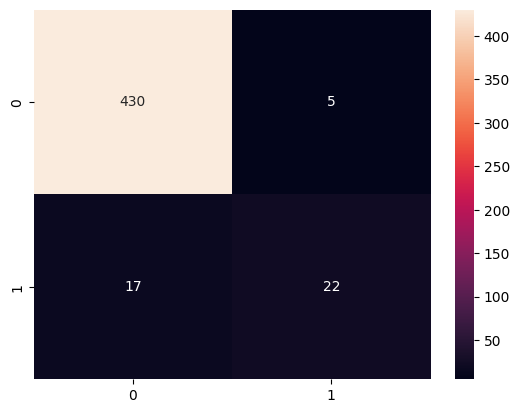

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")

In [30]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed’"],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto"]
}

# We initialize the random search
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
350 fits failed out of a total of 1750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'precomputed’']},
             scoring='accuracy')

In [41]:
best_model = grid.best_estimator_
best_model

SVC(C=1, degree=1, kernel='linear', random_state=42)

In [42]:
y_train_pred = best_model.predict(X_train)
y_train_pred


array([False, False, False, ..., False, False, False])

In [43]:
y_pred = best_model.predict(X_test)
y_pred

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
accuracy_score(y_train, y_train_pred)

0.946174142480211

In [45]:
accuracy_score(y_test, y_pred)

0.9535864978902954

In [46]:
gap = accuracy_score(y_train, y_train_pred) - accuracy_score(y_test, y_pred)
gap

-0.007412355410084337

In [47]:
f1_score(y_test, y_pred)

0.6666666666666667

In [48]:
roc_auc_score(y_test, y_pred)

0.7763041556145004

In [49]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       False       0.96      0.99      0.98       435\n        True       0.81      0.56      0.67        39\n\n    accuracy                           0.95       474\n   macro avg       0.89      0.78      0.82       474\nweighted avg       0.95      0.95      0.95       474\n'

<Axes: >

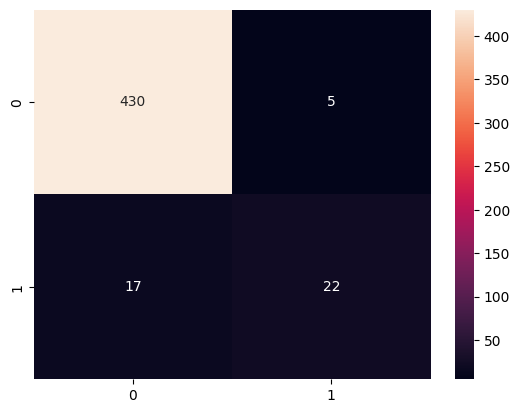

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d")